Setting Up the Environment

In [1]:
# installing necessary libriaries

!pip install pandas
!pip install seaborn
!pip install openpyxl

In [7]:
# importing necessary libriaries
# https://docs.google.com/spreadsheets/d/1FjeqvoxMeuhF6Cy43ar8tXk5_WO21gpreV6KNII02pI/edit#gid=0

# https://docs.google.com/spreadsheets/d/1lfjh6BWrcHISKKKncd7vpIgQXfvWM5tTogFA3WP_EmM/edit?gid=0#gid=0
import pandas as pd
import seaborn as sn
import openpyxl


# Reading the data provided
sheet_id = '1lfjh6BWrcHISKKKncd7vpIgQXfvWM5tTogFA3WP_EmM'

xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?formart=xlsx")
                    
Sheet1 = pd.read_excel(xls, 'Sheet1', header=3)

Sheet1

,Unnamed: 0,Did you encounter any challenges ↑,Unnamed: 2,How do you rate the platform
0,NaN,NaN,NaN,7.0
1,NaN,No comment,NaN,7.0
2,NaN,NaN,NaN,7.0
3,NaN,Yes,NaN,6.0
4,NaN,NaN,NaN,3.0
...,...,...,...,...
256,NaN,NaN,NaN,7.0
257,NaN,NaN,NaN,7.0
258,NaN,NaN,NaN,7.0
259,NaN,NaN,NaN,7.0


In [8]:
Sheet1.isna().any()

Unnamed: 0                             True
Did you encounter any challenges  ↑    True
Unnamed: 2                             True
How do you rate the platform           True
dtype: bool

In [12]:
rating_data = Sheet1.iloc[0:260, 3]
print(rating_data)

0      7.0
1      7.0
2      7.0
3      6.0
4      3.0
      ... 
255    7.0
256    7.0
257    7.0
258    7.0
259    7.0
Name: How do you rate the platform, Length: 260, dtype: float64


In [27]:
no_comment_data = rating_data.iloc[0:3]
print(no_comment_data)

0    7.0
1    7.0
2    7.0
Name: How do you rate the platform, dtype: float64


In [28]:
challenge_encountered = rating_data.iloc[3:32]
print(challenge_encountered)

3     6.0
4     3.0
5     4.0
6     5.0
7     5.0
8     4.0
9     2.0
10    6.0
11    5.0
12    7.0
13    4.0
14    7.0
15    2.0
16    7.0
17    7.0
18    3.0
19    7.0
20    7.0
21    6.0
22    7.0
23    7.0
24    3.0
25    5.0
26    5.0
27    5.0
28    6.0
29    7.0
30    4.0
31    6.0
Name: How do you rate the platform, dtype: float64


In [29]:
no_challenge_encountered = rating_data.iloc[32:261]
print(no_challenge_encountered)

32     5.0
33     7.0
34     7.0
35     6.0
36     7.0
      ... 
255    7.0
256    7.0
257    7.0
258    7.0
259    7.0
Name: How do you rate the platform, Length: 228, dtype: float64


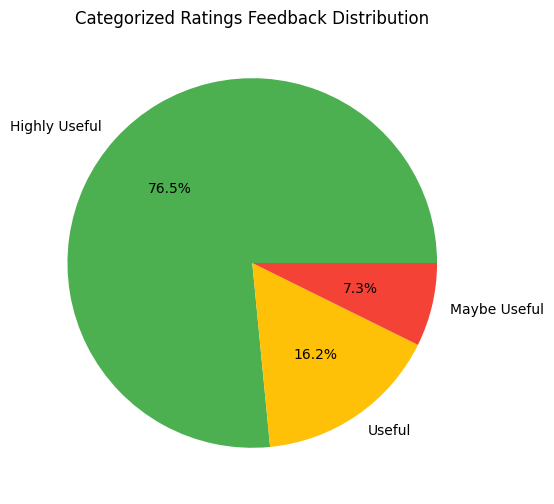

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Categorizing the ratings into feedback categories
def categorize_rating(rating_data):
    if rating_data >= 6:
        return "Highly Useful"
    elif rating_data >= 4:
        return "Useful"
    else:
        return "Maybe Useful"
    
    
# Apply categorization to the data
categorized_data = rating_data.apply(categorize_rating)

# Count occurrences in each category
category_counts = categorized_data.value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
category_counts.plot.pie(autopct='%1.1f%%', labels=category_counts.index, colors=['#4CAF50', '#FFC107', '#F44336'])
plt.title("Categorized Ratings Feedback Distribution")
plt.ylabel('')  
plt.show()

### Bar Chart for Categorized Ratings Distribution

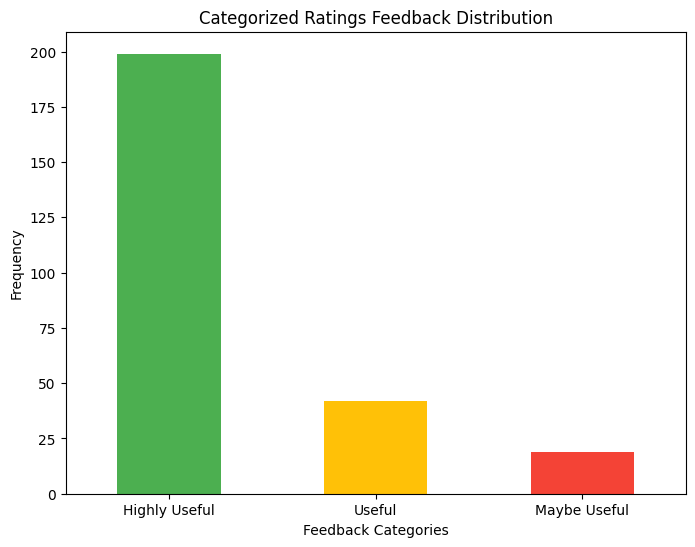

In [36]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title("Categorized Ratings Feedback Distribution")
plt.xlabel("Feedback Categories")
plt.ylabel("Frequency")
plt.xticks(rotation=0)  # Rotate x labels for readability
plt.show()


### Horizontal Bar Chart for Categorized Ratings Distribution

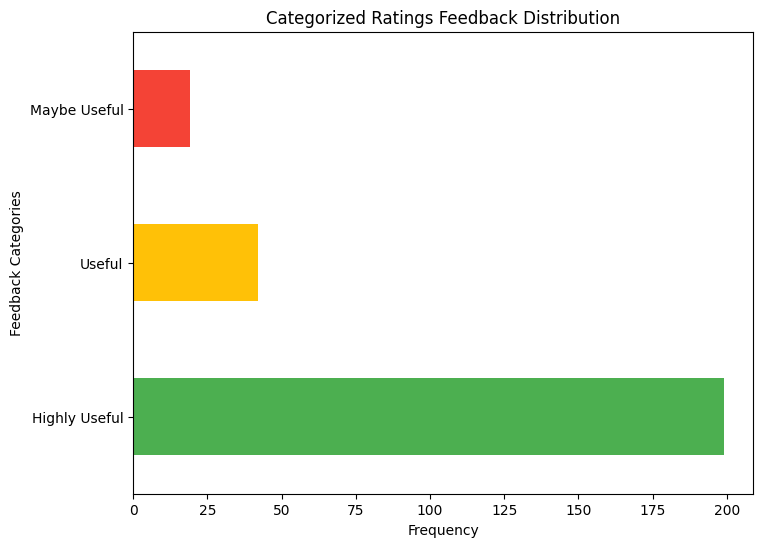

In [37]:
# Plotting the horizontal bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='barh', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title("Categorized Ratings Feedback Distribution")
plt.xlabel("Frequency")
plt.ylabel("Feedback Categories")
plt.show()


### Box Plot for Rating Data

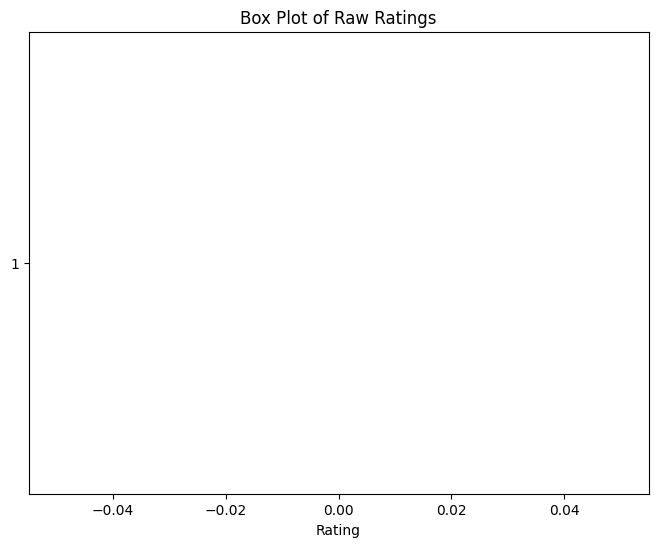

In [38]:
# Box plot for raw ratings
plt.figure(figsize=(8, 6))
plt.boxplot(rating_data, vert=False, patch_artist=True, boxprops=dict(facecolor='#FFC107'))
plt.title("Box Plot of Raw Ratings")
plt.xlabel("Rating")
plt.show()
